In [52]:
cd ..

/home/romi/projects


In [53]:
import pandas as pd
import os
import collections
from lab_notebooks.utils import TRANSFORMER, DEVICE, DATA_DIR

In [54]:
# data with j gene
# data_dir = DATA_DIR + "sequences_j_gene_csv_17M.csv"

# data with v gene
data_dir = DATA_DIR + "sequences_v_gene_csv_17M.csv"

# CDR3 from database (all human, trcb) to classify thresholds
# tcrb_data = pd.read_csv("/home/dsi/rgoldner/CDR3_data/db_nuc_vj_new.csv", usecols = ["aaSeqCDR3","SampleName"])

# CDR3 from database
#tcrb_data = pd.read_csv("/home/dsi/rgoldner/r_files/selected_sampleName_data.csv")

In [70]:
# load data
tcrb_data = pd.read_csv(data_dir,engine="pyarrow")

# Nofar dataset 
#tcrb_data = pd.read_csv("/home/dsi/rgoldner/CDR3_data/nofar_BCRA_CDR3.csv")
tcrb_data

,,amino_acid,v_gene,sample
0,0,CASSFELSGGNQPQHF,unresolved,1064_TCRB
1,1,CASNEEGNQQYF,TCRBV05-01,1064_TCRB
2,2,CASSSTGNTGELFF,TCRBV07-03,1064_TCRB
3,3,CASSTEQVMNTEAFF,unresolved,1064_TCRB
4,4,CASSFSALAGVIEQFF,TCRBV19-01,1064_TCRB
...,...,...,...,...
17746380,257316,CASSWGGETNTEAFF,TCRBV05-06,ADIRP0000351_TCRB
17746381,257317,CAWADSKNTEAFF,TCRBV30-01,ADIRP0000351_TCRB
17746382,257318,CASSTFAGYNTNTEAFF,TCRBV19-01,ADIRP0000351_TCRB
17746383,257320,CAWTMGGNHEAFF,TCRBV30-01,ADIRP0000351_TCRB


In [71]:
# edit column names
tcrb_data.rename(columns={'amino_acid': 'aaSeqCDR3'}, inplace=True)
tcrb_data.rename(columns={'sample': 'SampleName'}, inplace=True)

In [72]:
tcrb_data = tcrb_data[["aaSeqCDR3", "v_gene", "SampleName"]]
tcrb_data

,aaSeqCDR3,v_gene,SampleName
0,CASSFELSGGNQPQHF,unresolved,1064_TCRB
1,CASNEEGNQQYF,TCRBV05-01,1064_TCRB
2,CASSSTGNTGELFF,TCRBV07-03,1064_TCRB
3,CASSTEQVMNTEAFF,unresolved,1064_TCRB
4,CASSFSALAGVIEQFF,TCRBV19-01,1064_TCRB
...,...,...,...
17746380,CASSWGGETNTEAFF,TCRBV05-06,ADIRP0000351_TCRB
17746381,CAWADSKNTEAFF,TCRBV30-01,ADIRP0000351_TCRB
17746382,CASSTFAGYNTNTEAFF,TCRBV19-01,ADIRP0000351_TCRB
17746383,CAWTMGGNHEAFF,TCRBV30-01,ADIRP0000351_TCRB


In [73]:
len(collections.Counter(tcrb_data["SampleName"]))

99

In [74]:
# length of dataframe
len(tcrb_data.index)

17746385

In [75]:
# # select organism to be human
# tcrb_data = tcrb_data.loc[tcrb_data['Organism'] == "human"]
# # select Locus to be TCRB
# tcrb_data = tcrb_data.loc[tcrb_data['Locus'] == "TCRB"]
# len(tcrb_data.index)

In [76]:
# drop duplicate rows
tcrb_data_no_duplicates = tcrb_data.drop_duplicates()
len(tcrb_data_no_duplicates.index)

17400296

In [77]:
tcrb_data_no_duplicates.head()

,aaSeqCDR3,v_gene,SampleName
0,CASSFELSGGNQPQHF,unresolved,1064_TCRB
1,CASNEEGNQQYF,TCRBV05-01,1064_TCRB
2,CASSSTGNTGELFF,TCRBV07-03,1064_TCRB
3,CASSTEQVMNTEAFF,unresolved,1064_TCRB
4,CASSFSALAGVIEQFF,TCRBV19-01,1064_TCRB


In [78]:
# remove organism and locus - all are human and TCRB
# tcrb_data_no_duplicates = tcrb_data_no_duplicates.drop(['Organism', 'Locus'], axis=1)

In [79]:
collections.Counter(tcrb_data_no_duplicates['SampleName'])

Counter({'1064_TCRB': 112910,
         'KH20-09661_TCRB': 71174,
         'KH20-09962_TCRB': 121304,
         'KH20-09964_TCRB': 117184,
         '1059_TCRB': 135069,
         'BS-EQ-36-T0-replacement_TCRB': 89568,
         'KH20-09700_TCRB': 20405,
         'KHBR20-00168_TCRB': 98104,
         '860011264_TCRB': 332114,
         '1056_TCRB': 60490,
         'ADIRP0001296_TCRB': 98577,
         'ADIRP0001221_TCRB': 517353,
         'BS-HS-0147_TCRB': 131905,
         'ADIRP0002427_TCRB': 74549,
         'KH20-09967_TCRB': 170942,
         'KHBR20-00076_TCRB': 122649,
         '860011241_TCRB': 153781,
         'BS-GIGI_92-replacement_TCRB': 89359,
         'BS-EQ-43-T1_BS-GIGI-137-replacement_TCRB': 63548,
         'KH20-09694_TCRB': 132666,
         '860011230_TCRB': 149877,
         'BS-EQ-11-T3-replacement_TCRB': 44909,
         'ADIRP0002581_TCRB': 302681,
         'ADIRP0000739_TCRB': 513111,
         'KH20-09977_TCRB': 204340,
         '860011219_TCRB': 261981,
         '1129-LVM-

In [80]:
# count number of times aaSeqCDR3 appear - each sequence appears once in each sample so the duplicate occurances
# will be in different samples
num_of_occurances_df = tcrb_data_no_duplicates['aaSeqCDR3'].value_counts().to_frame()
len(num_of_occurances_df.index)
num_of_occurances_df.head()

,aaSeqCDR3
CASSLGETQYF,788
CASSLGGNTEAFF,636
CASSLGYEQYF,627
CASSSSYEQYF,611
CASSLQETQYF,594


In [81]:
num_of_occurances_df.index.name = 'Sequences'
num_of_occurances_df.reset_index(inplace=True)
num_of_occurances_df = num_of_occurances_df.rename(columns={'aaSeqCDR3': 'Appearances'})
num_of_occurances_df.head()

,Sequences,Appearances
0,CASSLGETQYF,788
1,CASSLGGNTEAFF,636
2,CASSLGYEQYF,627
3,CASSSSYEQYF,611
4,CASSLQETQYF,594


In [82]:
import matplotlib.pyplot as plt

In [83]:
stats = collections.Counter(num_of_occurances_df['Appearances'])

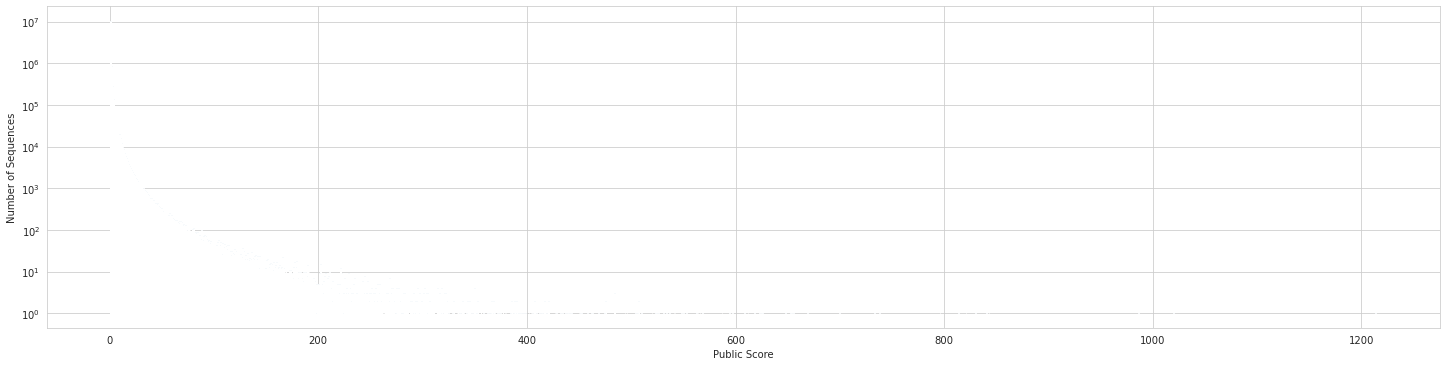

In [17]:
# bar plot for stats
plt.bar(stats.keys(), stats.values())
# change y axis to log scale
plt.yscale('log')
# plt.xscale('log')
# make the plot larger
plt.gcf().set_size_inches(20, 5)
# wider bars for better visualization
plt.tight_layout()
# set the x-axis label
plt.xlabel('Public Score')
# set the y-axis label
plt.ylabel('Number of Sequences')
# show plot
plt.show()

In [84]:
# if occurance value is larger than 1, the sequence is public(1), otherwise it's private(0)
# change here for different threshold 10,50,100
def label_public_private (row):
    if row['Appearances'] > 1 : return 1
    return 0

In [44]:
# int or bool instead of str
# try on 1000 elements as below
# overcommit (send message to assaf how i get sudo permissions to install ncdu, do overcommit)
# Last resort: divide data into 4 parts and do separately
# Search replacement for pandas that can handle large data - e.g. parquet

#df = num_of_occurances_df[:1000]
#df['Private_Public_label'] = df.apply(lambda row: label_public_private(row), axis=1)

In [85]:
num_of_occurances_df['Private_Public_label'] = \
    num_of_occurances_df.apply(lambda row: label_public_private(row), axis=1)

num_of_occurances_df.head()

,Sequences,Appearances,Private_Public_label
0,CASSLGETQYF,788,1
1,CASSLGGNTEAFF,636,1
2,CASSLGYEQYF,627,1
3,CASSSSYEQYF,611,1
4,CASSLQETQYF,594,1


In [86]:
tcrb_data_no_duplicates = tcrb_data_no_duplicates.rename(columns={'aaSeqCDR3': 'Sequences'})

In [87]:
# merge the two dataframes num_of_occurances_df and tcrb_data_no_duplicates on Sequences
merged_df = pd.merge(num_of_occurances_df, tcrb_data_no_duplicates, on='Sequences')

In [88]:
merged_df.head()

,Sequences,Appearances,Private_Public_label,v_gene,SampleName
0,CASSLGETQYF,788,1,TCRBV12-03/12-04,1064_TCRB
1,CASSLGETQYF,788,1,TCRBV27-01,1064_TCRB
2,CASSLGETQYF,788,1,TCRBV07-09,1064_TCRB
3,CASSLGETQYF,788,1,TCRBV05-06,1064_TCRB
4,CASSLGETQYF,788,1,TCRBV11-02,1064_TCRB


In [89]:
# remove SampleName column from merged_df and drop duplicates
merged_df_no_duplicates = merged_df.drop(['SampleName'], axis=1)
merged_df_no_duplicates = merged_df_no_duplicates.drop_duplicates()
len(merged_df_no_duplicates.index)

14938529

In [90]:
# output j gene embeddings to csv
output_path = "/home/romi/projects/preTCR/CDR3_data/sequences_j_gene_csv_17M_pub_priv.csv"

# output v gene embeddings to csv
output_path = "/home/romi/projects/preTCR/CDR3_data/sequences_v_gene_csv_17M_pub_priv.csv"

# create csv of occurances_with_sample_df
# output_path = '/home/dsi/rgoldner/CDR3_data/db_data_nuc_vj_genes_pub_priv.csv'

# create csv of occurances threshold 50
# output_path = '/home/dsi/rgoldner/CDR3_data/db_data_thresh_50_pub_priv.csv'

# create csv of appearances threshold 1
# output_path = '/home/dsi/rgoldner/CDR3_data/db_data_appearances.csv'

In [91]:
merged_df_no_duplicates.to_csv(output_path)